In [16]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_json('logins.json')
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
trips = pd.read_json('ultimate_data_challenge.json')
trips.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
trips = trips.sort_values(by=['signup_date'])

In [6]:
trips.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
4674,Astapor,2,2014-01-01,NaN,1.0,2014-06-28,iPhone,0.0,False,0.0,4.03,4.0
7672,Winterfell,1,2014-01-01,NaN,1.0,2014-01-01,iPhone,0.0,True,100.0,3.39,5.0
1431,Winterfell,0,2014-01-01,NaN,1.0,2014-06-08,iPhone,0.0,True,66.7,9.76,5.0
15387,Winterfell,2,2014-01-01,5.0,1.0,2014-06-20,Android,0.0,False,54.5,5.03,4.7
17482,Winterfell,0,2014-01-01,3.0,1.5,2014-05-18,iPhone,100.0,False,0.0,3.28,5.0


In [7]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 4674 to 30220
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [8]:
data.set_index('login_time', inplace=True)
data['count'] = 1
data = data.resample('15T').sum()
data.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


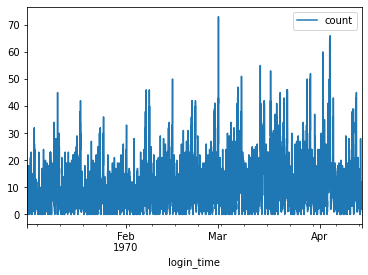

In [9]:
data.plot()
plt.show()

<AxesSubplot:xlabel='login_time'>

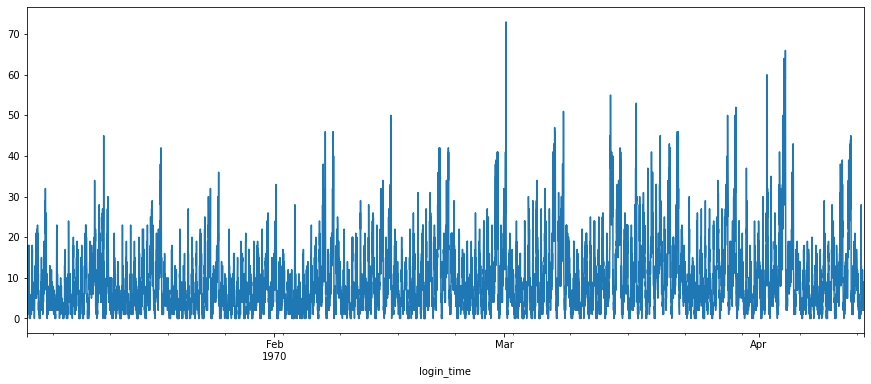

In [10]:
plt.figure(figsize=(15,6))
data['count'].plot()

In [17]:
data['timestamp'] = pd.to_datetime(data.index)

In [23]:
days = list(calendar.day_abbr)
months = list(calendar.month_abbr)


In [20]:
data['month'] = data['timestamp'].apply(lambda x: months[x.month])
data['day'] = data['timestamp'].apply(lambda x: days[x.weekday()])
data['hour'] = data['timestamp'].apply(lambda x: x.hour)
data['time'] = data['timestamp'].apply(lambda x: x.time())

In [24]:
data.head()

,count,timestamp,month,day,hour,time
login_time,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,Jan,Thu,20,20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00,Jan,Thu,20,20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00,Jan,Thu,20,20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00,Jan,Thu,20,20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00,Jan,Thu,21,21:00:00


<AxesSubplot:xlabel='day', ylabel='count'>

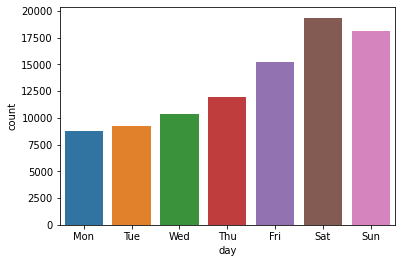

In [25]:
day_counts = data.groupby('day')['count'].sum()
sns.barplot(x=day_counts.index, y=day_counts, order=days)

<AxesSubplot:xlabel='month', ylabel='count'>

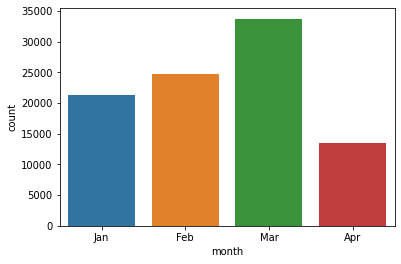

In [26]:
month_counts = data.groupby('month')['count'].sum()
sns.barplot(x=month_counts.index, y=month_counts, order=['Jan', 'Feb', 'Mar', 'Apr'])

In [27]:
hour_counts = data.groupby('hour')['count'].sum()

<AxesSubplot:xlabel='hour', ylabel='count'>

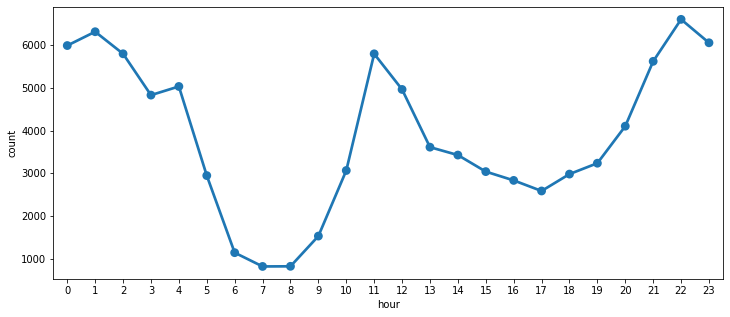

In [28]:
plt.figure(figsize=(12,5))
sns.pointplot(x=hour_counts.index, y=hour_counts)

In [29]:
time_counts = data.groupby('time')['count'].sum()
time_counts.sort_values(ascending=False).head(10)

time
22:30:00    1684
01:30:00    1673
22:15:00    1652
22:45:00    1637
22:00:00    1634
11:30:00    1622
01:15:00    1598
23:00:00    1573
11:45:00    1570
21:45:00    1554
Name: count, dtype: int64

<AxesSubplot:xlabel='time'>

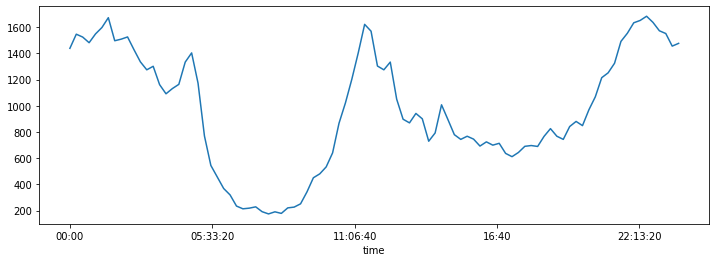

In [30]:
plt.figure(figsize=(12,4))
time_counts.plot()

Part 2: 

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


I will choose the time spend by the driver in each city as the key measure of success. Ideally the driver should spend a balanced time in both the cities for this experiment to be successful. However, if there is imbalance in this time spent, we will have to investigate further to figure out the reson behind that.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

We can perform A/B testing for this experimenr. The control group would be users that do not use the toll bridge and the test group would be users that do use the toll bridge. We'll have to keep track of the revenue gained from both sides and compare it against each other within a few months. A statistical test that we can use is applying a t-test, with a p-value of (0.5).

If there's no increase in profit then we will have to further investigate to find the root cause. If there is profit, then we can look at the factors that contributed the most to the increase and optimize those factors further. We can get beter results if we have a larger time frame.

In [31]:
data = pd.read_json('ultimate_data_challenge.json')

In [32]:
df2 =  pd.DataFrame(data)

In [33]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [35]:
df2['phone'] = df2['phone'].fillna('iPhone')

In [36]:
df2['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [37]:
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].median())

In [39]:
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean())

In [40]:
df2['signup_date'] = df2['signup_date'].apply(lambda x: pd.Timestamp(x, tz=None))
df2['last_trip_date'] = df2['last_trip_date'].apply(lambda x: pd.Timestamp(x, tz=None))

In [41]:
df2['last_trip_date'].sort_values(ascending=False).head(10)

4486    2014-07-01
43047   2014-07-01
24059   2014-07-01
40290   2014-07-01
28689   2014-07-01
41544   2014-07-01
44457   2014-07-01
21699   2014-07-01
15631   2014-07-01
33653   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [42]:
df2['retained'] = df2['last_trip_date'].apply(lambda x: 1 if x >= pd.Timestamp('2014-06-01', tz=None) else 0)

In [43]:
df2['retained'].value_counts()

0    31196
1    18804
Name: retained, dtype: int64

In [44]:
df2 = df2.drop('signup_date', axis=1)

In [45]:
df2 = df2.drop('last_trip_date', axis=1)

In [46]:
df2['ultimate_black_user'] = df2['ultimate_black_user'].apply(lambda x: 1 if x else 0)

<AxesSubplot:xlabel='ultimate_black_user', ylabel='count'>

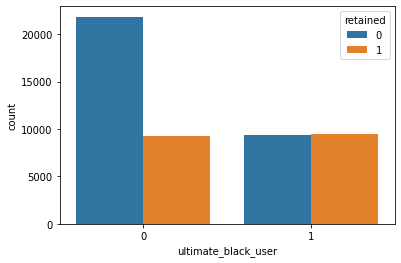

In [47]:
sns.countplot(x='ultimate_black_user', data=df2, hue='retained')

<AxesSubplot:xlabel='city', ylabel='count'>

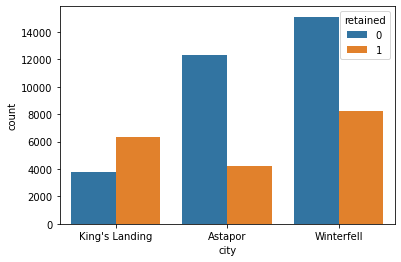

In [48]:
sns.countplot(x='city', data=df2, hue='retained')

<AxesSubplot:>

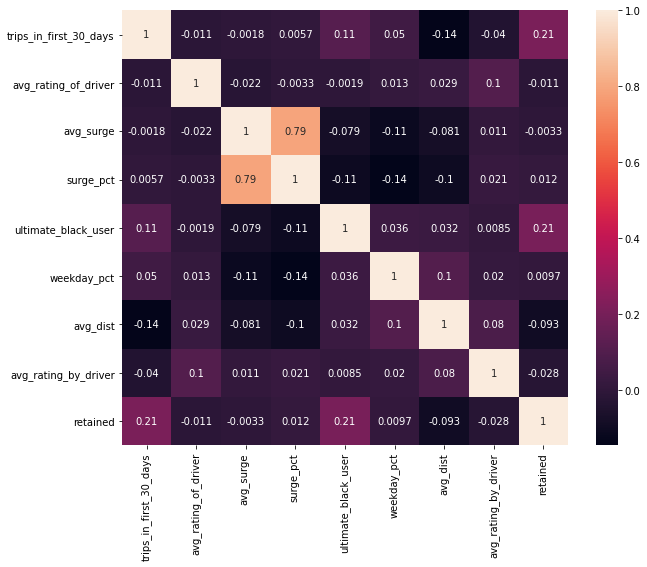

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True)

In [50]:
df2 = pd.get_dummies(df2, prefix='is')

In [51]:
X, y = df2.drop(['retained', 'avg_surge'], axis=1), df2['retained']

In [52]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.85, test_size=0.15, stratify=y)

In [53]:
classifier = GradientBoostingClassifier(verbose=True, n_estimators=200)
classifier.fit(train_X, train_y)
classifier.score(test_X, test_y)

      Iter       Train Loss   Remaining Time 
         1           1.2797            7.64s
         2           1.2436            6.27s
         3           1.2125            5.86s
         4           1.1850            5.50s
         5           1.1631            5.35s
         6           1.1430            5.27s
         7           1.1253            5.19s
         8           1.1097            5.28s
         9           1.0904            5.26s
        10           1.0742            5.18s
        20           0.9947            4.83s
        30           0.9595            4.42s
        40           0.9411            4.10s
        50           0.9306            3.84s
        60           0.9239            3.56s
        70           0.9193            3.27s
        80           0.9160            3.06s
        90           0.9125            2.88s
       100           0.9090            2.61s
       200           0.8896            0.00s


0.7892

<AxesSubplot:>

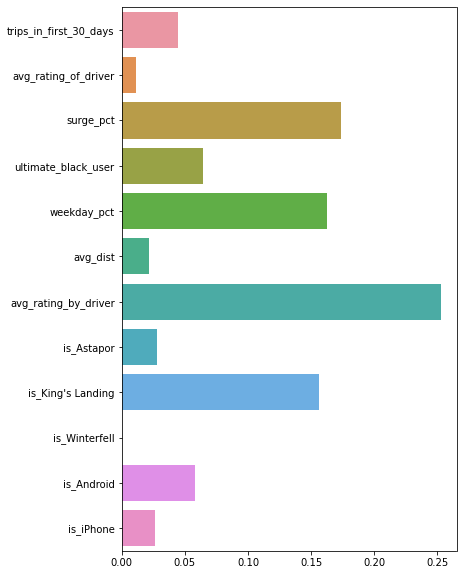

In [54]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=classifier.feature_importances_)

We are getting an accuracy score of 78.9% using Gradient Boosting algorithm. Users from King's Landing are more likely to be retained. We can find out the reason for this and further apply similar factors in other areas as well to achieve higher retention in all the areas.